In [320]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_excel('heart_disease.xlsx', sheet_name='Heart_disease')
df

<IPython.core.display.Javascript object>

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


# Label Encoding the categorical columns (sex, cp, fbs, restecg, exang, slope, thal)

In [5]:
# Instantiating LabelEncoder
label_encoder = LabelEncoder()

In [6]:
# Encoding the sex and fbs column
df.sex = label_encoder.fit_transform(df.sex)
df.fbs = label_encoder.fit_transform(df.fbs)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,typical angina,145,233,1,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,1,atypical angina,135,203,0,normal,132,False,0.0,flat,fixed defect,0
2,57,1,asymptomatic,140,192,0,normal,148,False,0.4,flat,fixed defect,0
3,52,1,typical angina,118,186,0,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,1,asymptomatic,110,201,0,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,asymptomatic,125,0,0,normal,120,False,1.5,upsloping,reversable defect,4
904,62,1,asymptomatic,166,170,0,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,1,non-anginal,170,0,0,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,1,non-anginal,144,208,1,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [7]:
#The exang column must essentially be bool type as it contains true and false values but it is object because the true and false are spelled incorrectly
#Lets identify the true and false values
exang_vals = df.exang.unique().tolist()
true_i = [1,3]
false_i = [0,2]
exang_true_vals = [exang_vals[i] for i in true_i]
exang_false_vals = [exang_vals[i] for i in false_i]
(exang_true_vals,exang_false_vals)

([True, 'TURE'], [False, 'FALSE'])

In [8]:
#Replacing all true values with 1 and all false values with 0
df.exang = df.exang.replace(exang_false_vals, value=0)
df.exang = df.exang.replace(exang_true_vals, value=1)


In [9]:
#We can see that now exang has 0/1 in it
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,typical angina,145,233,1,lv hypertrophy,150,0,2.3,downsloping,fixed defect,0
1,41,1,atypical angina,135,203,0,normal,132,0,0.0,flat,fixed defect,0
2,57,1,asymptomatic,140,192,0,normal,148,0,0.4,flat,fixed defect,0
3,52,1,typical angina,118,186,0,lv hypertrophy,190,0,0.0,flat,fixed defect,0
4,57,1,asymptomatic,110,201,0,normal,126,1,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,asymptomatic,125,0,0,normal,120,0,1.5,upsloping,reversable defect,4
904,62,1,asymptomatic,166,170,0,st-t abnormality,120,1,3.0,flat,reversable defect,4
905,56,1,non-anginal,170,0,0,lv hypertrophy,123,1,2.5,downsloping,normal,4
906,56,1,non-anginal,144,208,1,st-t abnormality,105,1,NaN,downsloping,fixed defect,4


In [10]:
#Replacing the original values of the cp column with there corresponding numerical values
cp_original_vals = df.cp.unique().tolist()
cp_new_vals = [0,1,3,2]
cp_original_vals, cp_new_vals

(['typical angina', 'atypical angina', 'asymptomatic', 'non-anginal'],
 [0, 1, 3, 2])

In [11]:
df.cp = df.cp.replace(dict( zip(cp_original_vals, cp_new_vals)))

In [12]:
df.cp

0      0
1      1
2      3
3      0
4      3
      ..
903    3
904    3
905    2
906    2
907    3
Name: cp, Length: 908, dtype: int64

In [13]:
#Replacing the original values of the restech column with there corresponding numerical values

restecg_oroginal_vals = df['restecg'].unique().tolist()
restecg_new_vals = [2,0,1]
df['restecg'] = df['restecg'].replace(dict(zip(restecg_oroginal_vals, restecg_new_vals)))
df['restecg']

0      2
1      0
2      0
3      2
4      0
      ..
903    0
904    1
905    2
906    1
907    1
Name: restecg, Length: 908, dtype: int64

In [14]:
#Replacing the original values of the slope column with there corresponding numerical values

slope_oroginal_vals = df['slope'].unique().tolist()
slope_new_vals = [2,1,0]
df['slope'] = df['slope'].replace(dict(zip(slope_oroginal_vals, slope_new_vals)))
df['slope']

0      2
1      1
2      1
3      1
4      1
      ..
903    0
904    1
905    2
906    2
907    1
Name: slope, Length: 908, dtype: int64

In [15]:
#Replacing the original values of the thal column with there corresponding numerical values

thal_oroginal_vals = df['thal'].unique().tolist()
thal_new_vals = [1,0,2]
df['thal'] = df['thal'].replace(dict(zip(thal_oroginal_vals, thal_new_vals)))
df['thal']

0      1
1      1
2      1
3      1
4      1
      ..
903    2
904    2
905    0
906    1
907    2
Name: thal, Length: 908, dtype: int64

In [16]:
# All the categorical columns have been encoded using numerical values
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,0,145,233,1,2,150,0,2.3,2,1,0
1,41,1,1,135,203,0,0,132,0,0.0,1,1,0
2,57,1,3,140,192,0,0,148,0,0.4,1,1,0
3,52,1,0,118,186,0,2,190,0,0.0,1,1,0
4,57,1,3,110,201,0,0,126,1,1.5,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,3,125,0,0,0,120,0,1.5,0,2,4
904,62,1,3,166,170,0,1,120,1,3.0,1,2,4
905,56,1,2,170,0,0,2,123,1,2.5,2,0,4
906,56,1,2,144,208,1,1,105,1,NaN,2,1,4


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    int32  
 2   cp        908 non-null    int64  
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    int64  
 6   restecg   908 non-null    int64  
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    int64  
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    int64  
 11  thal      908 non-null    int64  
 12  num       908 non-null    int64  
dtypes: float64(1), int32(1), int64(11)
memory usage: 88.8 KB


In [18]:
df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']].describe()

,age,trestbps,chol,thalch,oldpeak
count,908.000000,908.000000,908.000000,908.000000,846.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253
std,9.158031,20.401608,112.097949,26.804929,1.093875
min,29.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.750000,120.000000,176.750000,118.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000
75%,60.000000,144.000000,270.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


In [19]:
#The data set has sufficient values of all categoroies except for '4'
df['num'].value_counts()

num
0    399
1    265
2    109
3    107
4     28
Name: count, dtype: int64

# Handling missing values of oldpeak

In [20]:
#Getting the mean of oldpeak for each category of num into a series
mean_oldpeak_for_each_num = df.groupby('num')['oldpeak'].transform('mean')
mean_oldpeak_for_each_num = mean_oldpeak_for_each_num.apply(lambda a: '{:.1f}'.format(a))
mean_oldpeak_for_each_num

0      0.4
1      0.4
2      0.4
3      0.4
4      0.4
      ... 
903    2.3
904    2.3
905    2.3
906    2.3
907    2.3
Name: oldpeak, Length: 908, dtype: object

In [21]:
#Replacing the null values with the categorical mean values of the oldpeak
df['oldpeak'] = df['oldpeak'].fillna(mean_oldpeak_for_each_num)
df['oldpeak'] 

0      2.3
1      0.0
2      0.4
3      0.0
4      1.5
      ... 
903    1.5
904    3.0
905    2.5
906    2.3
907    2.3
Name: oldpeak, Length: 908, dtype: object

In [22]:
#After filling into the missing spots the datatype of the oldpeak column had changed to object. 
#Make it float once again
df['oldpeak'] = df['oldpeak'].astype('float')
df['oldpeak']

0      2.3
1      0.0
2      0.4
3      0.0
4      1.5
      ... 
903    1.5
904    3.0
905    2.5
906    2.3
907    2.3
Name: oldpeak, Length: 908, dtype: float64

In [31]:
#Storing numerical columns in separately
df_numerical = df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']]

In [62]:
df_numerical.describe()

,age,trestbps,chol,thalch,oldpeak
count,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.901762
std,9.158031,20.401608,112.097949,26.804929,1.065815
min,29.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.750000,120.000000,176.750000,118.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.600000
75%,60.000000,144.000000,270.000000,156.000000,1.525000
max,77.000000,200.000000,603.000000,202.000000,6.200000


# The minimum for 'trestbps' & 'chol' values is 0
# Blood Pressure can in very rare cases be 0
# Cholestrol cannot be 0
# Lets check the box plots for these two columns

<IPython.core.display.Javascript object>

array([ 80,   0, 190, 181, 188, 193, 196, 192, 185, 200, 184, 192, 186,
       200, 200, 200, 188, 182, 196, 193, 186, 190], dtype=int64)

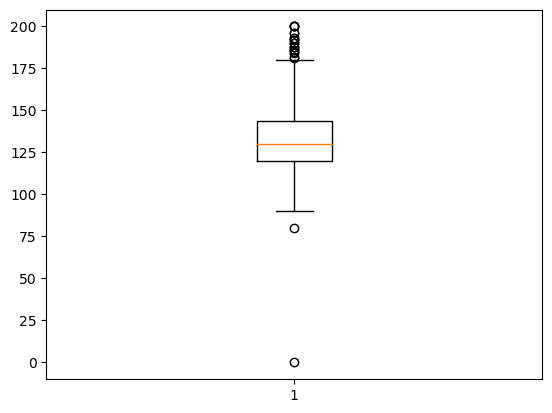

In [70]:
trestbps_box = plt.boxplot(df_numerical['trestbps'])
trestbps_box['fliers'][0].get_ydata()

# There is nothing extraordinary in the resting bp values. All these values are normally seen in adults. 
# Even the '0' value is possible in certain special conditions.

<IPython.core.display.Javascript object>

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 417, 439, 564, 458, 481, 459, 432, 468, 41

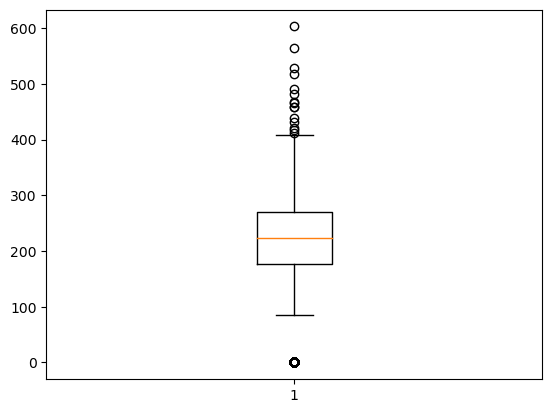

In [72]:
#Lets check the boxplot of the 'chol' column as it also had min value as '0'
chol_box = plt.boxplot(df_numerical['chol'])
chol_box['fliers'][0].get_ydata()

# After researching about the cholestrol levels in humans, I learned that cholestrol cannot be 0 mg/dl.
# So all these '0' values in the chol are there due to some error and we need to change these values
# Cholestrol values that are very high are possible in critical cases

In [88]:
#The '0's are like missing values for us. Lets replace them with Nan for convenience in replacing them using fillna()
df['chol'] = df['chol'].replace(0, np.nan)
df['chol']

<IPython.core.display.Javascript object>

0      233.0
1      203.0
2      192.0
3      186.0
4      201.0
       ...  
903      NaN
904    170.0
905      NaN
906    208.0
907    277.0
Name: chol, Length: 908, dtype: float64

In [91]:
#Getting the mean chol for each categories
mean_chol_in_num_categories = df.groupby('num')['chol'].transform('mean')
mean_chol_in_num_categories = mean_chol_in_num_categories.astype('int')
mean_chol_in_num_categories

0      244
1      244
2      244
3      244
4      244
      ... 
903    240
904    240
905    240
906    240
907    240
Name: chol, Length: 908, dtype: int32

In [92]:
#Finally replacing the nan values with the mean values for their corresponding categories
df['chol'] = df['chol'].fillna(mean_chol_in_num_categories)
df['chol']

0      233.0
1      203.0
2      192.0
3      186.0
4      201.0
       ...  
903    240.0
904    170.0
905    240.0
906    208.0
907    277.0
Name: chol, Length: 908, dtype: float64

In [93]:
#Updating the 'df_numerical' as well
df_numerical = df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']]

In [94]:
df_numerical.describe()

,age,trestbps,chol,thalch,oldpeak
count,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,133.430617,249.103524,135.957048,0.901762
std,9.158031,20.401608,55.436389,26.804929,1.065815
min,29.000000,0.000000,85.000000,60.000000,-2.600000
25%,47.750000,120.000000,216.000000,118.000000,0.000000
50%,54.000000,130.000000,250.000000,138.000000,0.600000
75%,60.000000,144.000000,270.000000,156.000000,1.525000
max,77.000000,200.000000,603.000000,202.000000,6.200000


# Lets check the boxplot of other numerical columns as well (age, thalch & oldpeak)

<IPython.core.display.Javascript object>

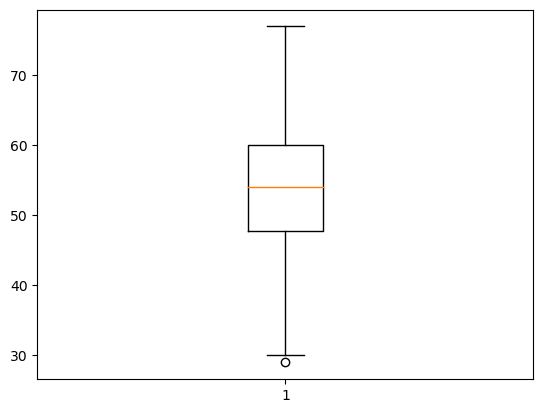

In [101]:
#Box plot of age
plt.boxplot(df['age']);

<IPython.core.display.Javascript object>

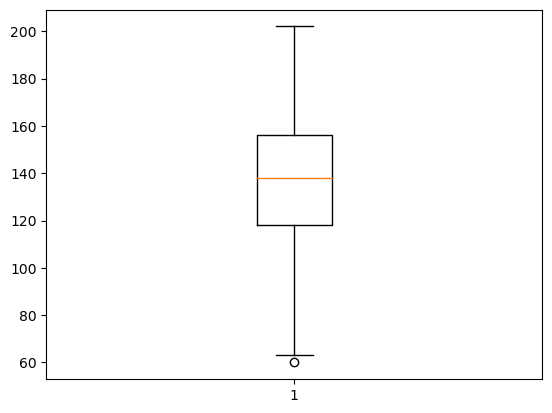

In [102]:
#Box plot of thalch
plt.boxplot(df['thalch']);

<IPython.core.display.Javascript object>

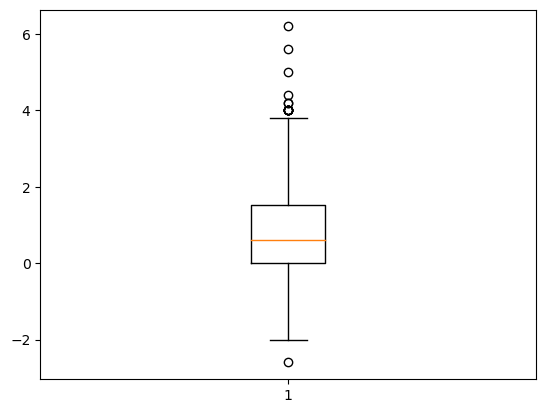

In [103]:
#Box plot of oldpeak
plt.boxplot(df['oldpeak']);

# There is nothing extraordinary about these columns

# Lets see the correlations

In [112]:
#Correlation of num column with all other columns
df.corr()['num']
#num do not have a very good correlation with any of the other columns

age         0.326493
sex         0.259605
cp          0.391356
trestbps    0.137251
chol        0.031579
fbs         0.156268
restecg     0.137494
thalch     -0.323058
exang       0.359549
oldpeak     0.453744
slope       0.148117
thal        0.226924
num         1.000000
Name: num, dtype: float64

In [114]:
#Taking the categorical columns out in a separate variable
df_categorical = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'num']]

# There are very few females in our dataset


sex
1    718
0    190
Name: count, dtype: int64


<IPython.core.display.Javascript object>

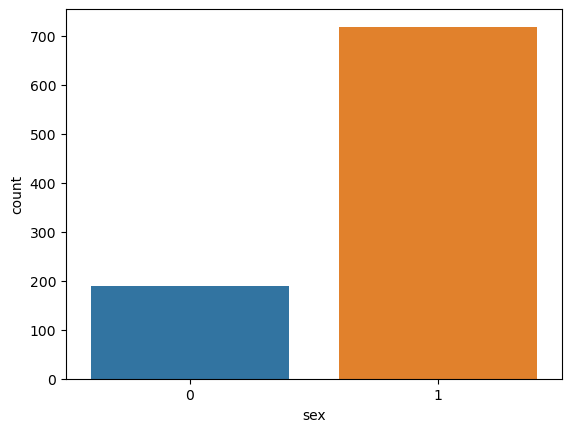

In [134]:
print(df_categorical['sex'].value_counts())
sns.countplot(x=df_categorical['sex']);


In [122]:
#Getting the heart conditions of females
females_heart_disease_stage = df[df['sex']==0]['num']
females_heart_disease_stage

10     0
11     0
16     0
17     0
18     0
      ..
802    3
819    3
824    3
886    4
889    4
Name: num, Length: 190, dtype: int64

In [129]:
#Getting the heart conditions of males
males_heart_disease_stage = df[df['sex']==1]['num']
males_heart_disease_stage

0      0
1      0
2      0
3      0
4      0
      ..
903    4
904    4
905    4
906    4
907    4
Name: num, Length: 718, dtype: int64

# Number of Females in each stage of Heart Conditions


<IPython.core.display.Javascript object>

num
0    140
1     30
2     10
3      8
4      2
Name: count, dtype: int64


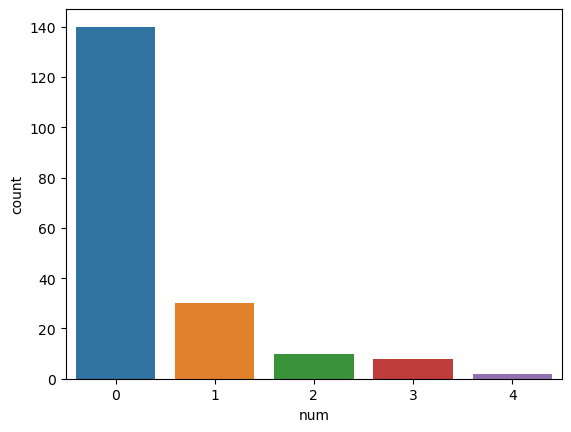

In [131]:
sns.countplot(x=females_heart_disease_stage);
print(females_heart_disease_stage.value_counts())

# Number of males in each stage of Heart Conditions


<IPython.core.display.Javascript object>

num
0    259
1    235
2     99
3     99
4     26
Name: count, dtype: int64


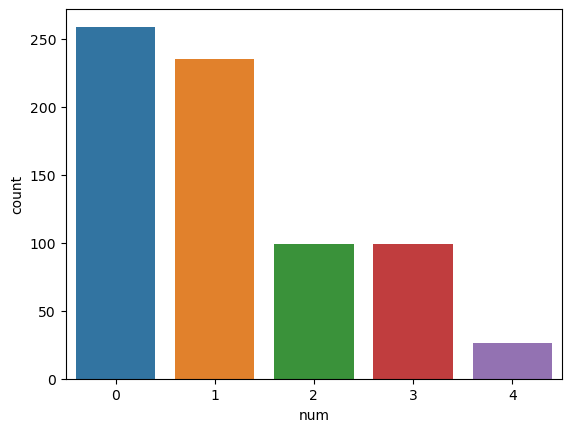

In [132]:
sns.countplot(x=males_heart_disease_stage);
print(males_heart_disease_stage.value_counts())

# Males are 3.5 times the Females in our dataset
# Yet the more proportion of males have heart conditions than females
# Number of Males with no heart conditions = 259 
# Number of males with stage 1 to stage 4 = 359 (58%)
# Number of Females with no heart conditions = 140
# Number of Females with stage 1 to stage 4 = 50 (35%)


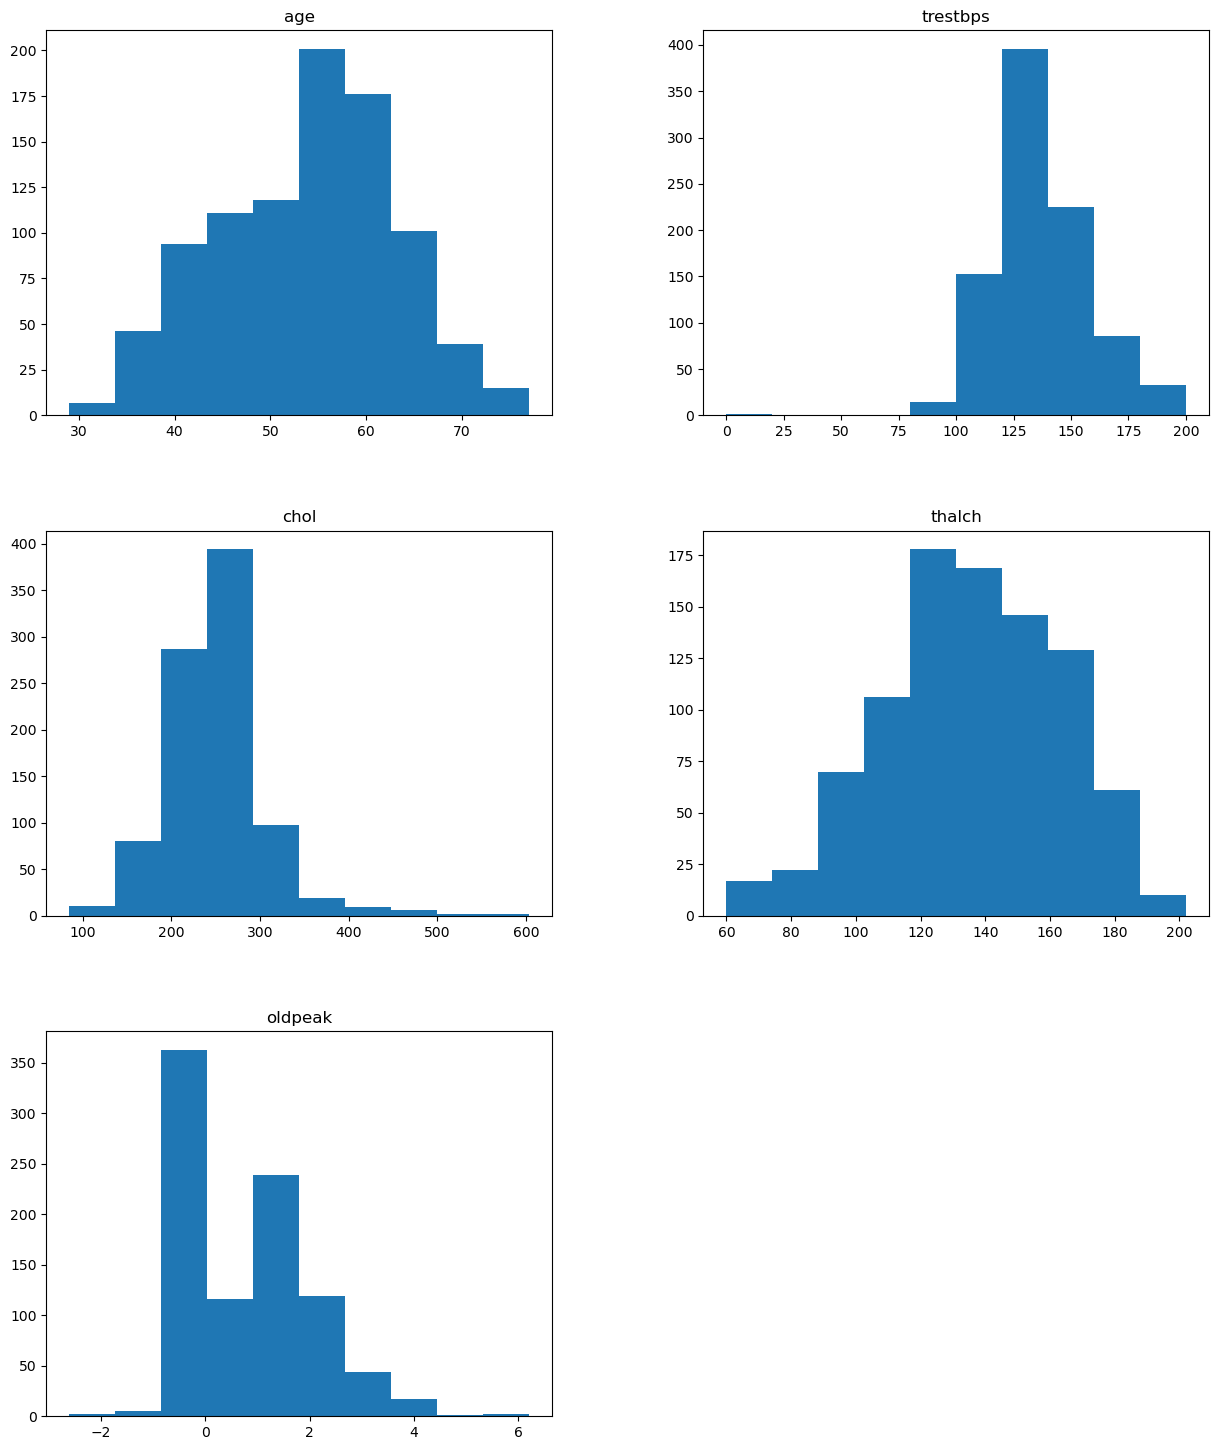

In [99]:
#Histogram of numerical columns
df_numerical.hist(figsize=(15,18), grid=False);

# Distribution type of numerical features do not give any substantial insight in this case

In [280]:
#Imports
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [324]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [484]:
#Storing the features into X and the target column into y
X, y = df.iloc[:,:-1], df['num']
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1,0,145,233.0,1,2,150,0,2.3,2,1
1,41,1,1,135,203.0,0,0,132,0,0.0,1,1
2,57,1,3,140,192.0,0,0,148,0,0.4,1,1
3,52,1,0,118,186.0,0,2,190,0,0.0,1,1
4,57,1,3,110,201.0,0,0,126,1,1.5,1,1


In [485]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: num, dtype: int64

In [486]:
#Performing train test split with ratio 80:20
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [487]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
865,63,1,2,130,250.0,0,1,111,1,0.0,1,2
439,58,1,3,170,256.0,1,1,105,1,0.0,2,0
342,41,1,1,120,291.0,0,1,160,0,0.0,2,0
736,61,1,3,146,241.0,0,0,148,1,3.0,2,1
785,54,1,3,110,206.0,0,2,108,1,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
580,52,1,3,140,266.0,0,0,134,1,2.0,1,1
868,65,1,3,126,312.0,0,2,156,0,1.6,2,0
445,53,1,3,140,203.0,1,2,155,1,3.1,2,2
786,54,1,3,122,286.0,0,2,116,1,3.2,1,0


In [488]:
#Initializing a DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(random_state=42)



In [273]:
#Training the decision tree on our training data
decisiontree.fit(X_train, y_train)
#Getting the accuracy on the test data
decisiontree.score(X_test, y_test)

0.554945054945055

In [274]:
#Cross validating our model with KFold cross validation to get the more accurate performance of model
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cvscore = cross_val_score(estimator=decisiontree, X=X, y=y, cv=kfold)
print('Accuracy in different folds:',cvscore)
print('Mean Accuracy: ',cvscore.mean())

Accuracy in different folds: [0.55494505 0.56043956 0.56043956 0.53038674 0.50276243]
Mean Accuracy:  0.5417946694189788


### We could acheive the accuracy of around 54% without any hyper parameter tuning

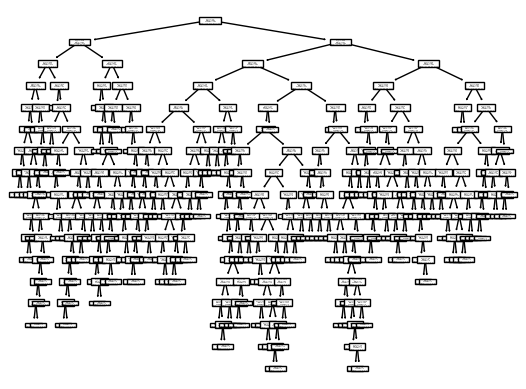

In [258]:
tree.plot_tree(decisiontree);

### We can see that the decision tree without any limitation of parameters grows to 16 levels
### We can see its other characteristics below

In [276]:
# Get characteristics
tree_depth = decisiontree.get_depth()
n_leaves = decisiontree.get_n_leaves()
n_nodes = decisiontree.tree_.node_count
feature_importances = decisiontree.feature_importances_

print(f"Tree Depth: {tree_depth}")
print(f"Number of Leaves: {n_leaves}")
print(f"Number of Nodes: {n_nodes}")
print(f"Feature Importances: {feature_importances}")

Tree Depth: 16
Number of Leaves: 234
Number of Nodes: 467
Feature Importances: [0.12765269 0.02663571 0.12774777 0.10112996 0.21747001 0.01445881
 0.03612946 0.10343194 0.031877   0.11448897 0.04072295 0.05825473]


# Performing Hyperparameter tuning of the Decision Tree with the GridSearchCV

## 1.Accuracy : Tuning for best accuracy

In [336]:
#Initializing the values to pass in the gridsearchcv

#Model with basix set parameters
estimator = DecisionTreeClassifier(random_state=42)

#Parameters with which the model will be tested
param_grid = {'max_depth': list(range(3,20)), 
              'min_samples_split': list(range(2,90)),
               'max_features': ["auto", "sqrt", "log2", 12, 11,10,9,8,7,6,5,4,3,2 ]
             }
#KFold instance
kfold = KFold(n_splits=5, shuffle=True, random_state=42)


In [337]:
#Initializing the instance of the gridsearchcv
#Scoring parameter is by default set to None, so it optimizes the accuracy in this case
gridsearch = GridSearchCV(estimator = estimator, param_grid=param_grid, n_jobs=-1, return_train_score=False, cv=kfold )

#Running the model on data
gridsearch.fit(X,y)

#Getting the results of the grid search
#The results are in the form of a dictionary containing all the combinations of hyperparameters, their test scores for each fold and their aggregate score
gridsearch_results = gridsearch.cv_results_

#Getting the best cross val score of the decision tree model
print('Best Accuracy: ',gridsearch.best_score_)

#The hyperparameters with which the best score arrived
print('Best Parameters: ',gridsearch.best_params_)

Best Accuracy:  0.6221844453888653
Best Parameters:  {'max_depth': 10, 'max_features': 9, 'min_samples_split': 62}


In [339]:
#Storing the results of the gridsearch into a dataframe
gridsearch_results = pd.DataFrame(gridsearch_results)
gridsearch_results.head()

<IPython.core.display.Javascript object>

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000000,0.000000,0.0,0.0,3,auto,2,"{'max_depth': 3, 'max_features': 'auto', 'min_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,19449
1,0.000000,0.000000,0.0,0.0,3,auto,3,"{'max_depth': 3, 'max_features': 'auto', 'min_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,19449
2,0.006589,0.008070,0.0,0.0,3,auto,4,"{'max_depth': 3, 'max_features': 'auto', 'min_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,19449
3,0.003854,0.006587,0.0,0.0,3,auto,5,"{'max_depth': 3, 'max_features': 'auto', 'min_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,19449
4,0.001866,0.000557,0.0,0.0,3,auto,6,"{'max_depth': 3, 'max_features': 'auto', 'min_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,19449


## Doing predictions on our X_test with the obtained best hyperparameters

In [341]:
best_deci_tree = DecisionTreeClassifier(max_depth= 10, max_features= 9, min_samples_split= 62, random_state=42)
#Training
best_deci_tree.fit(X_train, y_train)
#Predicting
y_pred = best_deci_tree.predict(X_test)

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

#Accuracy
accuracy = accuracy_score(y_test, y_pred)

print('Confusion Matrix')
print(cm)
print('Accuracy: ',accuracy)

Confusion Matrix
[[75 11  2  1  0]
 [17 23  2  6  0]
 [ 4  9  6  3  0]
 [ 4  9  1  3  0]
 [ 0  5  1  0  0]]
Accuracy:  0.5879120879120879


## Interpreting the effectiveness of predictions via confusion matrix
### In Test Data
### True People with Health Issues : 93
### 25/93 Declared as healthy (Very Dangerous!!!)
### 25/93 Declared to be at lower stage than actual stage (Very Dangerous!!!)
### 32/93 Correct Prediction of Stage
### 11/93 Predicted with a higher stage than actual stage (Problematic!)
## We can see that the model is not effective in correctly identifying the health conditions 


# 2. Precision : Optimize the precision 

## 2.1 Macro Precision

In [343]:
#Initializing the instance of the gridsearchcv
gridsearch_mac_prec = GridSearchCV(estimator = estimator, param_grid=param_grid, n_jobs=-1, return_train_score=False, cv=kfold, scoring='precision_macro' )

#Running the model on data
gridsearch_mac_prec.fit(X,y)

#Getting the results of the grid search
#The results are in the form of a dictionary containing all the combinations of hyperparameters, their test scores for each fold and their aggregate score
gridsearch_results_mac_prec = gridsearch_mac_prec.cv_results_

#Getting the best cross val score of the decision tree model
print('Best Macro-Precision: ',gridsearch_mac_prec.best_score_)

#The hyperparameters with which the best score arrived
print('Best Parameters: ',gridsearch_mac_prec.best_params_)

Best Macro-Precision:  0.554272984325616
Best Parameters:  {'max_depth': 7, 'max_features': 10, 'min_samples_split': 18}


## Checking the individual precision scores of each class with best parameters

In [349]:
decitree = DecisionTreeClassifier(max_depth= 7, max_features= 10, min_samples_split= 18, random_state=42)
decitree.fit(X_train, y_train)
y_pred = decitree.predict(X_test)
precision = precision_score(y_test, y_pred, average=None)
print('precision scores:', precision)

precision scores: [0.75       0.41538462 0.42857143 0.57142857 0.        ]


## 2.2 Micro Precision 

## Micro precision in case of multi-class classification is essentially equal to the accuracy score

In [346]:
#Initializing the instance of the gridsearchcv
gridsearch_mic_prec = GridSearchCV(estimator = estimator, param_grid=param_grid, n_jobs=-1, return_train_score=False, cv=kfold, scoring='precision_micro' )

#Running the model on data
gridsearch_mic_prec.fit(X,y)

#Getting the results of the grid search
#The results are in the form of a dictionary containing all the combinations of hyperparameters, their test scores for each fold and their aggregate score
gridsearch_results_mic_prec = gridsearch_mic_prec.cv_results_

#Getting the best cross val score of the decision tree model
print('Best Micro-Precision: ',gridsearch_mic_prec.best_score_)

#The hyperparameters with which the best score arrived
print('Best Parameters: ',gridsearch_mic_prec.best_params_)

Best Micro-Precision:  0.6221844453888653
Best Parameters:  {'max_depth': 10, 'max_features': 9, 'min_samples_split': 62}


## Checking the individual precision scores of each class with best parameters

In [350]:
decitree = DecisionTreeClassifier(max_depth= 10, max_features= 9, min_samples_split= 62, random_state=42)
decitree.fit(X_train, y_train)
y_pred = decitree.predict(X_test)
precision = precision_score(y_test, y_pred, average=None)
print('precision scores:', precision)

precision scores: [0.75       0.40350877 0.5        0.23076923 0.        ]


## 2.3 Weighted Precision

In [347]:
#Initializing the instance of the gridsearchcv
gridsearch_weg_prec = GridSearchCV(estimator = estimator, param_grid=param_grid, n_jobs=-1, return_train_score=False, cv=kfold, scoring='precision_weighted' )

#Running the model on data
gridsearch_weg_prec.fit(X,y)

#Getting the results of the grid search
#The results are in the form of a dictionary containing all the combinations of hyperparameters, their test scores for each fold and their aggregate score
gridsearch_results_weg_prec = gridsearch_weg_prec.cv_results_



In [348]:
#Getting the best cross val score of the decision tree model
print('Best Weighted-Precision: ',gridsearch_weg_prec.best_score_)

#The hyperparameters with which the best score arrived
print('Best Parameters: ',gridsearch_weg_prec.best_params_)

Best Weighted-Precision:  0.6277280652886359
Best Parameters:  {'max_depth': 6, 'max_features': 11, 'min_samples_split': 39}


## In disease classification problems, its is important that maximum number of people declared healthy are actually healthy. 

## This can be judged by seeing the precision score of class '0', which says the what percentage of people who were declared to be healthy were actually healthy



## Checking the individual precision scores of each class with best parameters

In [516]:
#Performing train test split with ratio 80:20
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.2)

#Creating a decision tree classifier with the best parameters obtained
decitree = DecisionTreeClassifier(max_depth= 7, max_features= 10, min_samples_split= 18, random_state=42)
decitree.fit(X_train, y_train)
y_pred = decitree.predict(X_test)
precision = precision_score(y_test, y_pred, average=None)
conf_mat = confusion_matrix(y_test, y_pred)
print('Obtained by tuning on weighted precision')
print('precision scores:', precision)
print('Confusion Matrix: ','\n', conf_mat,'\n')


#Creating a decision tree classifier with the best parameters obtained
decitree = DecisionTreeClassifier(max_depth= 10, max_features= 9, min_samples_split= 62, random_state=42)
decitree.fit(X_train, y_train)
y_pred = decitree.predict(X_test)
precision = precision_score(y_test, y_pred, average=None)
conf_mat = confusion_matrix(y_test, y_pred)
print('Obtained by tuning on weighted precision')
print('precision scores:', precision)
print('Confusion Matrix: ','\n', conf_mat,'\n')

#Creating a decision tree classifier with the best parameters obtained
decitree = DecisionTreeClassifier(max_depth= 6, max_features= 11, min_samples_split= 39, random_state=42)
decitree.fit(X_train, y_train)
y_pred = decitree.predict(X_test)
precision = precision_score(y_test, y_pred, average=None)
conf_mat = confusion_matrix(y_test, y_pred)
print('Obtained by tuning on weighted precision')
print('precision scores:', precision)
print('Confusion Matrix: ','\n', conf_mat,'\n')

#Performing train test split with ratio 80:20
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

Obtained by tuning on weighted precision
precision scores: [0.69148936 0.50819672 0.8        0.3125     0.        ]
Confusion Matrix:  
 [[65 11  0  3  0]
 [22 31  0  1  1]
 [ 5  7  8  3  0]
 [ 1  9  2  5  0]
 [ 1  3  0  4  0]] 

Obtained by tuning on weighted precision
precision scores: [0.67       0.48484848 1.         0.33333333 0.        ]
Confusion Matrix:  
 [[67 11  0  1  0]
 [22 32  0  1  0]
 [ 4 11  4  4  0]
 [ 4  9  0  4  0]
 [ 3  3  0  2  0]] 

Obtained by tuning on weighted precision
precision scores: [0.7311828  0.55384615 0.77777778 0.26666667 0.        ]
Confusion Matrix:  
 [[68  9  1  1  0]
 [16 36  0  3  0]
 [ 3  9  7  4  0]
 [ 4  8  1  4  0]
 [ 2  3  0  3  0]] 



## Running accross different randomly sampled data for train and test
## We can see that precision of class '0' ranges widely between 50% 90% which is very poor.
## Analysing the confusion matrix of the models, none of them are reliable predictors

# 3. Recall

## Recall is a great metric as it gives the measure of how many instances have been correctly identified in each class. 
## Our main motive is to maximize the number of true predictions for each classes especially in classes 1,2,3,& 4. These are critical classes, and false negatives(failing to predict their instances) is very serious.
## We will choose the type of recall that gives more importance to recall values of these classes.
## Out of 3 types of recall (macro, micro, weighted), macro is the best suitable for our motive. 

## 3.1 Macro Recall

In [356]:


#Initializing the instance of the gridsearchcv
gridsearch_mac_recall = GridSearchCV(estimator = estimator, param_grid=param_grid, n_jobs=-1, return_train_score=False, cv=kfold, scoring='recall_macro' )

#Running the model on data
gridsearch_mac_recall.fit(X,y)

#Getting the results of the grid search
#The results are in the form of a dictionary containing all the combinations of hyperparameters, their test scores for each fold and their aggregate score
gridsearch_results_mac_recall = gridsearch_mac_recall.cv_results_



In [357]:
#Getting the best cross val score of the decision tree model
print('Best Macro-Recall: ',gridsearch_mac_recall.best_score_)

#The hyperparameters with which the best score arrived
print('Best Parameters: ',gridsearch_mac_recall.best_params_)

Best Macro-Recall:  0.4530429775111437
Best Parameters:  {'max_depth': 16, 'max_features': 6, 'min_samples_split': 3}


In [697]:
#Performing train test split with ratio 80:20
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#Creating a decision tree classifier with the best parameters obtained
decitree = DecisionTreeClassifier(max_depth= 16, max_features= 6, min_samples_split= 3, random_state=42)
decitree.fit(X_train, y_train)
y_pred = decitree.predict(X_test)
recall = recall_score(y_test, y_pred, average=None)
conf_mat = confusion_matrix(y_test, y_pred)
print('Obtained by tuning on macro recall')
print('recall scores:', recall)
print('Confusion Matrix: ','\n', conf_mat,'\n')

#Performing train test split with ratio 80:20
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

Obtained by tuning on macro recall
recall scores: [0.74157303 0.5        0.45454545 0.23529412 0.        ]
Confusion Matrix:  
 [[66 17  1  2  3]
 [17 24  3  3  1]
 [ 4  5 10  1  2]
 [ 4  9  0  4  0]
 [ 1  2  3  0  0]] 



## The above model is not good.

# ------------------------------------------------------------------------------------------------------

# Converting our multiclass classification problem into binary classification
## This will better classify Healthy & Non-Healthy due to less complex classification
## Let's call it PHASE-1


# *******HYPER PARAMETER TUNING FOR PHASE-1 MODEL**

## Finding Best precision of healthy class

In [410]:
#Creating a target of binary classes. 1=healthy , 0=heart problems
y_bin_unh_h =y.astype('str')
y_bin_unh_h =y_bin_1_0.replace({'0':1,'1':0,'2':0,'3':0,'4':0})


In [411]:
#The values were converted to string type. We need to convert them back to int
y_bin_unh_h = y_bin_unh_h.astype('int')
y_bin_unh_h.value_counts()

num
0    509
1    399
Name: count, dtype: int64

In [412]:
# Creating a train test split with target of binary classes
#Performing train test split with ratio 80:20
X_train, X_test , y_bin_unh_h_train, y_bin_unh_h_test = train_test_split(X,y_bin_unh_h, test_size=0.2, random_state=42)

In [413]:
#Initializing the instance of the gridsearchcv
gridsearch_bin_unh_h_prec = GridSearchCV(estimator = estimator, param_grid=param_grid, n_jobs=-1, return_train_score=False, cv=kfold, scoring='precision' )

#Running the model on data
gridsearch_bin_unh_h_prec.fit(X,y_bin_unh_h)

#Getting the results of the grid search
#The results are in the form of a dictionary containing all the combinations of hyperparameters, their test scores for each fold and their aggregate score
gridsearch_results_bin_unh_h_prec = gridsearch_bin_unh_h_prec.cv_results_


In [414]:

#Getting the best cross val score of the decision tree model
print('Best Precision of healthy class: ',gridsearch_bin_unh_h_prec.best_score_)

#The hyperparameters with which the best score arrived
print('Best Parameters: ',gridsearch_bin_unh_h_prec.best_params_)

#print the confusion matrix
confu_mat = confusion_matrix()

Best Precision of healthy class:  0.8235870647635354
Best Parameters:  {'max_depth': 13, 'max_features': 4, 'min_samples_split': 64}


## Finding best recall of unhealthy class

In [418]:
#Creating a target of binary classes. 0=heathy , 1=heart problems
y_bin_h_unh =y.astype('str')
y_bin_h_unh =y_bin_h_unh.replace(to_replace="[1-4]", value=1, regex=True)


In [419]:
#The values were converted to string type. We need to convert them back to int
y_bin_h_unh = y_bin_h_unh.astype('int')
y_bin_h_unh.value_counts()

num
1    509
0    399
Name: count, dtype: int64

In [531]:
# Creating a train test split with target of binary classes
#Performing train test split with ratio 80:20
X_train, X_test , y_bin_h_unh_train, y_bin_h_unh_test = train_test_split(X,y_bin_h_unh, test_size=0.2, random_state=42)

In [421]:
#Initializing the instance of the gridsearchcv
gridsearch_bin_h_unh_recall = GridSearchCV(estimator = estimator, param_grid=param_grid, n_jobs=-1, return_train_score=False, cv=kfold, scoring='recall' )

#Running the model on data
gridsearch_bin_h_unh_recall.fit(X,y_bin_h_unh)

#Getting the results of the grid search
#The results are in the form of a dictionary containing all the combinations of hyperparameters, their test scores for each fold and their aggregate score
gridsearch_results_bin_h_unh_prec = gridsearch_bin_h_unh_recall.cv_results_


In [422]:

#Getting the best cross val score of the decision tree model
print('Best Recall of unhealthy class: ',gridsearch_bin_h_unh_recall.best_score_)

#The hyperparameters with which the best score arrived
print('Best Parameters: ',gridsearch_bin_h_unh_recall.best_params_)

Best Recall of unhealthy class:  0.8889717166693067
Best Parameters:  {'max_depth': 13, 'max_features': 4, 'min_samples_split': 64}


## Lets cross validate the model with different fold than the one on which it gave best precision

In [597]:
#Creating a decision tree classifier with the best parameters obtained
decitree = DecisionTreeClassifier(max_depth= 13, max_features= 4, min_samples_split= 64, random_state=42)
kfold = KFold(n_splits=5, shuffle=True)
cv_score = cross_val_score(estimator=decitree, X=X, y=y_bin_unh_h, scoring='precision', cv = kfold )


print('Obtained by tuning on precision of healthy class (Unhealthy=0, Healthy=1)\n')
print('Validated precision scores of healthy class:', cv_score, '\n')
print('Mean Precision:', cv_score.mean(), '\n')


#Creating a decision tree classifier with the best parameters obtained
decitree = DecisionTreeClassifier(max_depth= 13, max_features= 4, min_samples_split= 64, random_state=42)
kfold = KFold(n_splits=5, shuffle=True)
cv_score = cross_val_score(estimator=decitree, X=X, y=y_bin_h_unh, scoring='recall', cv = kfold )

print('Obtained by tuning on recall of unhealthy class (Healthy=0, UnHealthy=1)\n')
print('Validated recall scores of unhealthy class:', cv_score, '\n')
print('Mean Recall:', cv_score.mean(), '\n')



Obtained by tuning on precision of healthy class (Unhealthy=0, Healthy=1)

Validated precision scores of healthy class: [0.7804878  0.86363636 0.7125     0.71929825 0.65060241] 

Mean Precision: 0.7453049647534004 

Obtained by tuning on recall of unhealthy class (Healthy=0, UnHealthy=1)

Validated recall scores of unhealthy class: [0.78       0.87       0.75490196 0.78787879 0.87037037] 

Mean Recall: 0.8126302238066943 



## Running the cross validations multiple times we can see that the actual precision of healthy predictions range between 70% - 80% 
## Meaning : The 20% - 30% of the people predicted as healthy are actually not healthy

## Running the cross validations multiple times  with random shuffles we can see that the actual recall of unhealthy predictions range between 75% - 85% 
## Meaning : The 20% - 25% of the people who are unhealthy are predicted as healthy

# These two inferences say that the model isn't reliable predictor yet these results are best we have got so far so we will move forward with this model towards classifying the stage of heart problem

# **PHASE-1 CLASSIFICATION

In [634]:
# Creating a train test split with target of binary classes
#Performing train test split with ratio 80:20

X_train, X_test , y_bin_h_unh_train, y_bin_h_unh_test = train_test_split(X,y_bin_h_unh, test_size=0.2, random_state=42)

#Creating the classifier with the best parameters
deci_tree = DecisionTreeClassifier(max_depth=13, max_features=4, min_samples_split=62, random_state=42)
deci_tree.fit(X_train, y_bin_h_unh_train)
y_pred = deci_tree.predict(X_test)
recall = recall_score(y_bin_h_unh_test, y_pred)
print('Recall Score: ',recall)

#creating a dataframe of predicted values and actual values 
pred_and_actual = pd.DataFrame( y_pred, index=y_bin_h_unh_test.index, columns=['y_pred'])
pred_and_actual['Actual'] = y_bin_h_unh_test

#Getting the indices of those rows which were predicted as unhealthy
test2_indices = pred_and_actual[pred_and_actual['y_pred']==1].index
test2_indices 


Recall Score:  0.8387096774193549


<IPython.core.display.Javascript object>

Index([865, 439, 736, 785, 837, 903, 735, 537, 906, 141,
       ...
       516, 845, 541,   5,  54, 722, 758, 580, 445, 786],
      dtype='int64', length=104)

## After classifying our data into healthy and unhealthy we will classify those predicted as unhealthy into stages of heart problems
## For this classification we will again find out the best parameters
## For the 2nd phase classification training set will be the unhealthy instances from the previous training set
## Test set will be instances predicted to be un healthy

In [658]:

#Performing train test split with ratio 80:20
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#Creating the training and testing sets for the 2nd phase
#Training sets are the unhealthy instances from the previous training set
X_train2 = X_train[y_train>0]
y_train2 = y_train[y_train>0]
#Test set are those instances which were predicted to be unhealthy
X_test2 = X_test.loc[test2_indices.tolist()]
y_test2 = y_test.loc[test2_indices.tolist()]

print('X_train2 :', len(X_train2))
print('y_train2 :', len(y_train2),)
print('X_test2 :', len(X_test2),)
print('y_test2 :', len(y_test2),)

X2 = pd.concat([X_train2, X_test2], axis=0)
y2 = pd.concat([y_train2, y_test2], axis=0)

X_train2 : 416
y_train2 : 416
X_test2 : 104
y_test2 : 104


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Lets find the best parameters for the model for the 2nd phase classification

In [724]:
#Initializing the values to pass in the gridsearchcv

#Model with basix set parameters
estimator = DecisionTreeClassifier(random_state=42)

#Parameters with which the model will be tested
param_grid = {'max_depth': list(range(3,20)), 
              'min_samples_split': list(range(2,90)),
               'max_features': ["auto", "sqrt", "log2", 12, 11,10,9,8,7,6,5,4,3,2 ]
             }
#KFold instance
kfold = KFold(n_splits=5, shuffle=True, random_state=42)


In [711]:
#Creating the gridsearch instance
gridsearch = GridSearchCV(estimator=estimator, param_grid=param_grid, return_train_score=False, scoring='recall_macro', n_jobs=-1, cv = kfold)
#passing our data to the grid search
gridsearch.fit(X2, y2)
#Getting the resukts of the grid search
gridsearch_result = gridsearch.cv_results_

In [712]:

#Getting the best cross val score of the decision tree model
print('Best Recall Macro: ',gridsearch.best_score_)

#The hyperparameters with which the best score arrived
print('Best Parameters: ',gridsearch.best_params_)

Best Recall Macro:  0.46592448651160473
Best Parameters:  {'max_depth': 12, 'max_features': 11, 'min_samples_split': 12}


In [732]:
best_model = DecisionTreeClassifier(max_depth= 12, max_features= 11, min_samples_split= 12, random_state=42)
best_model.fit(X_train2,y_train2)
y_pred2 = best_model.predict(X_test2)
recall = recall_score(y_test2, y_pred2, average=None)
print('recall', recall)
confusion_matrix(y_test2, y_pred2)

recall [0.         0.69444444 0.5        0.3125     0.        ]


array([[ 0, 18,  1,  7,  0],
       [ 0, 25,  2,  7,  2],
       [ 0,  6, 10,  4,  0],
       [ 0, 11,  0,  5,  0],
       [ 0,  4,  1,  1,  0]], dtype=int64)

## Although its macro recall is very poor
## Confusion matrix suggests that it is the best performance that we have got till now 

# Using the 2 phase classification
## Overall Recalls of
## class 1 : 25/48 (12 predicted as healthy) = 52.08%
## class 2 : 10/22 (2 predicted as healthy) = 45.45%
## class 3 : 5/17 (1 predicted as healthy )= 29.41%
## class 4 : 0/6  = 0.0%
## Recalls of these unhealthy classes are the most important metric 
## This is the best that we have obtained

## Previously we had obtained best recalls 
## class 1 : 24/48 (17 predicted as healthy ) = 50%
## class 2 : 10/22 (4 predicted as healthy ) = 45.45%
## class 3 : 4/17 (4 predicted as healthy)= 23.52%
## class 4 : 0/6  = (1 predicted as healthy) 0.0%
# Our 2 phase classification did marginally better in terms of recalls
# More significantly it has less number of unhealthy people marked as healthy


# Explaination of 2 Phase Classification Approach:
## We converted a multi-class disease classification problem into a binary classification problem. We called it Phase-1 classification
## We found out the best hyperparameters for the binary classification model using GridSearchCV
## Best Phase-1 Model Parameters : max_depth=13, max_features=4, min_samples_split=64
## Lets classify our test data into healthy and unhealthy using this model
## Then in Phase-2 classification we will classify the stage of problem for those who are classified as unhealthy in Phase-1
## In Phase-2 test data would be those instances that are predicted to be unhealthy in the phase-1
## And training data would be all the unhealthy instances in the training data(X_train, y_train) of phase 1
## Use the combined train and test data of phase-2 in the GridSearchCV to find the best hyperparameters for the Phase-2 Model
## Best Phase-2 Model parameters : max_depth=12, max_features=11, min_samples_split=12
## Use this Phase-2 model to classify the instances into different stages of heart problem

# -------------------------------------------------------------------------------------------------------

# Analysis of Evaluation Metrics

## Evaluation metrics like Accuracy, Precision, Recall, F1 Score are not optimal for evaluating the performance of models on multiclass disease classification 
## Because in this case recalls of unhealthy classes are very important that the healthy classes but there is no way we can tune our hyperparameters on the basis of recalls of specific classes. They must to be tuned on the basis of aggregated recalls which brings down the significance of the model
## In order to evaluate the model's performance better we must read the confusion matrix.